In [81]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import numpy as np
from numpy import quantile, where
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve,roc_auc_score

# Understanding the Data

<h3>Context</h3>

In [2]:
data = pd.read_csv('/kaggle/input/credit-card/application_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
data.columns[:50]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APART

In [5]:
data.columns[51:100]

Index(['FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOC

In [6]:
data.columns[101:]

Index(['FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [7]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data['TARGET'].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

In [9]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [10]:
isfraud_ = data['TARGET']

<h3>Visualisation</h3>

Text(0.5, 1.0, 'Count of Children vs Count of Family Members')

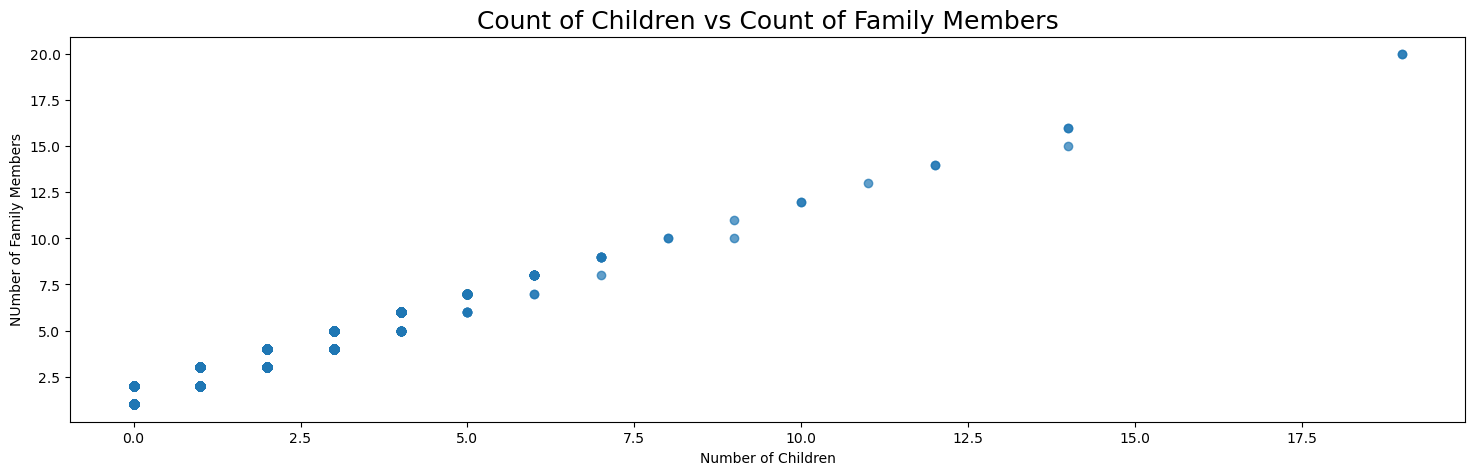

In [11]:
plt.figure(figsize=(18,5))
plt.scatter(data['CNT_CHILDREN'],data['CNT_FAM_MEMBERS'],alpha=0.7)
plt.xlabel('Number of Children')
plt.ylabel('NUmber of Family Members')
plt.title('Count of Children vs Count of Family Members',size=18)

<AxesSubplot:>

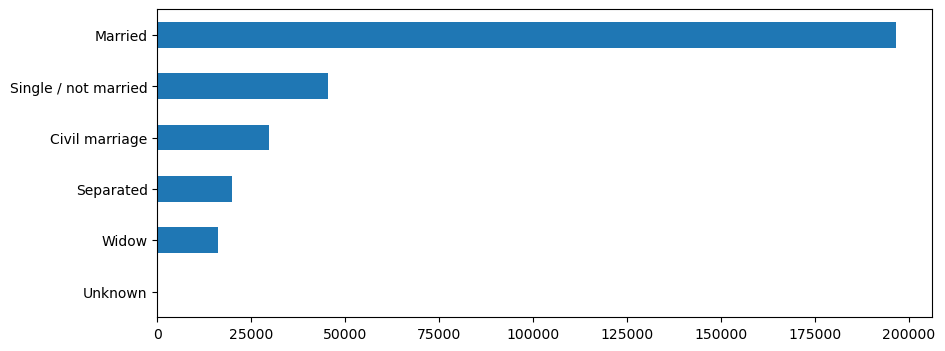

In [12]:
plt.figure(figsize=(10,4))
data['NAME_FAMILY_STATUS'].value_counts().sort_values(ascending=True).plot(kind='barh')

Text(0.5, 1.0, 'Number of tax payers by occupation')

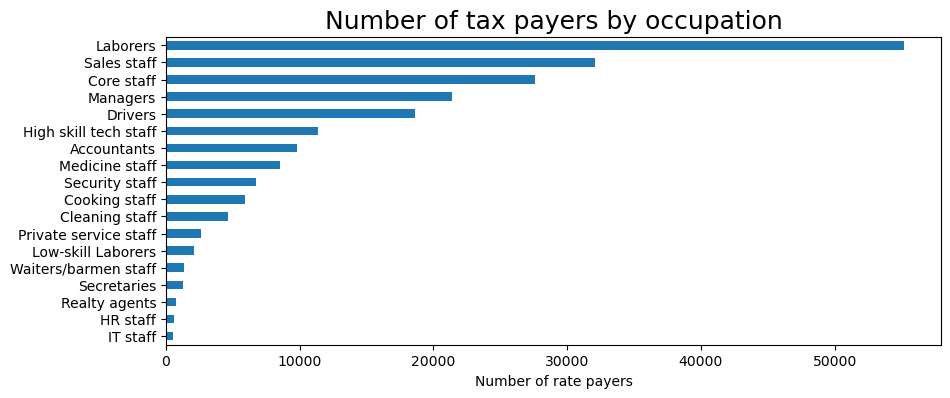

In [13]:
plt.figure(figsize=(10,4))
data['OCCUPATION_TYPE'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of rate payers')
plt.title('Number of tax payers by occupation',size=18)

Text(0.5, 0, 'Count per Organisation type')

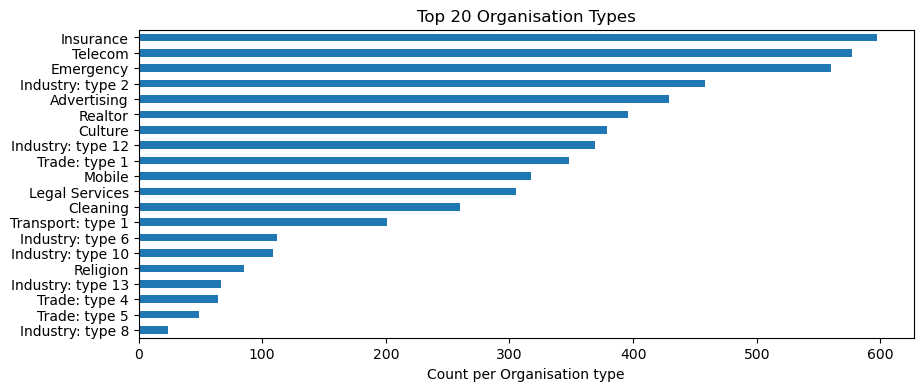

In [14]:
plt.figure(figsize=(10,4))
data['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=True)[:20].plot(kind='barh')
plt.title('Top 20 Organisation Types')
plt.xlabel('Count per Organisation type')

Text(0, 0.5, 'Average land area')

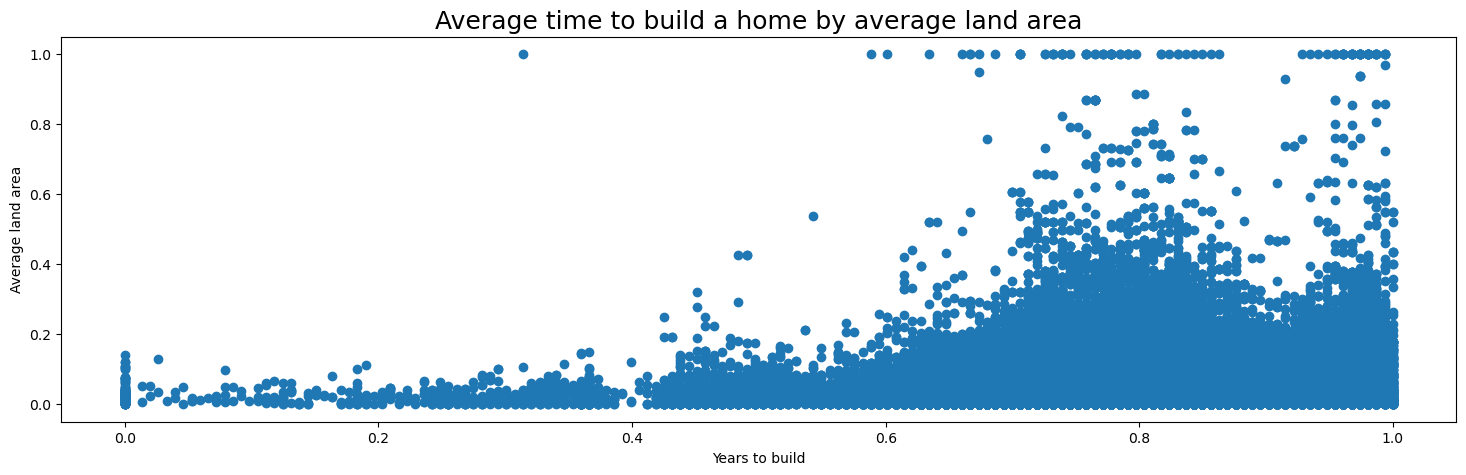

In [15]:
plt.figure(figsize=(18,5))
plt.title('Average time to build a home by average land area',size=18)
plt.scatter(data['YEARS_BUILD_MODE'],data['LANDAREA_AVG'])
plt.xlabel('Years to build')
plt.ylabel('Average land area')

<AxesSubplot:>

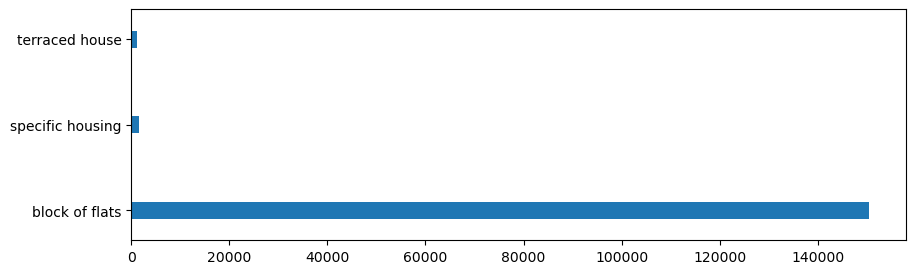

In [16]:
plt.figure(figsize=(10,3))
data['HOUSETYPE_MODE'].value_counts().plot(kind='barh',width=0.2)

Text(0.5, 1.0, 'A distribution with a median build time higher than the mean')

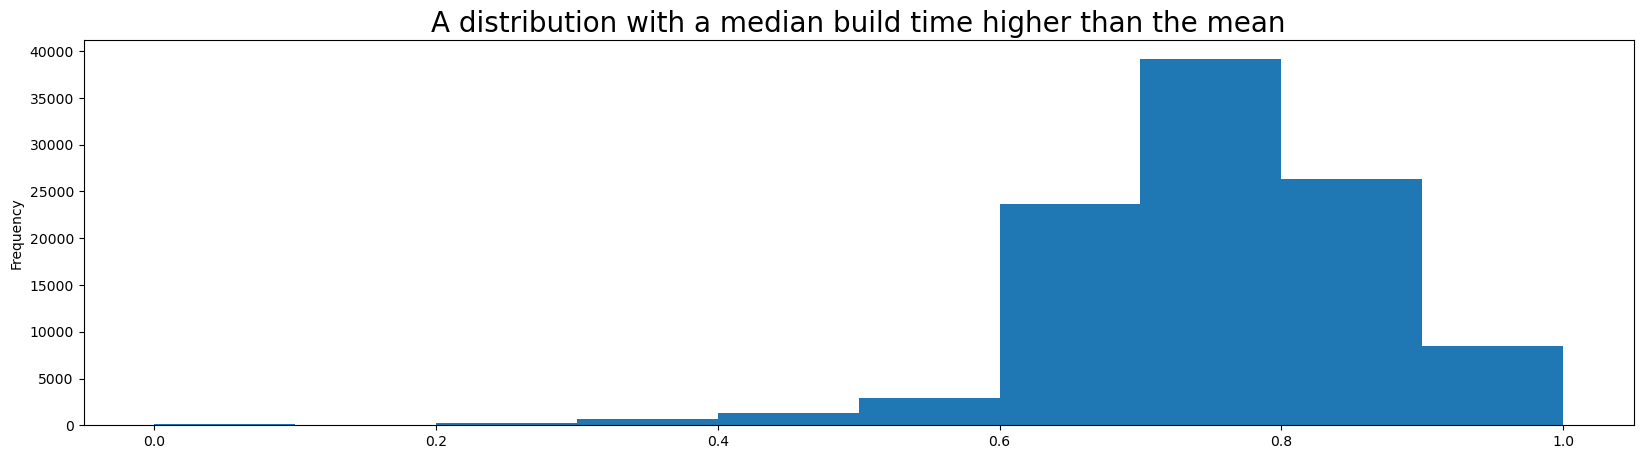

In [17]:
plt.figure(figsize=(20,5))
data['YEARS_BUILD_MEDI'].plot(kind='hist')
plt.title('A distribution with a median build time higher than the mean',size=20)

In [18]:
data['YEARS_BUILD_MEDI'].median(),data['YEARS_BUILD_MEDI'].mean()

(0.7585, 0.7557462721916463)

# Preprocessing

<h3>Feature Engineering</h3>

In [19]:
data.isnull().sum()[:50]

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [20]:
data.isnull().sum()[51:100]

FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE                   182590
LIVINGAPARTMENTS_MODE           210199
LIVINGAREA_MODE                 154350
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAREA_MODE              169682
APARTMENTS_MEDI                 156061
BASEMENTAREA_MEDI               179943
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BUILD_MEDI                204488
COMMONAREA_MEDI          

In [21]:
data.isnull().sum()[101:]

FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_13                  0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [22]:
data.drop(columns=['TARGET','OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG'
                   ,'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG'
                   ,'ELEVATORS_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG'
                   ,'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG'
                   ,'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE'
                   ,'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE'
                   ,'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE'
                   ,'LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI'
                   ,'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE'
                   ,'HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'
                   ,'ENTRANCES_AVG','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE'
                   ,'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI'
                   ,'BASEMENTAREA_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI'
                   ,'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI'
                   ,'YEARS_BEGINEXPLUATATION_MEDI']
          ,inplace=True)

In [23]:
data.isnull().sum()[:50]

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
C

In [24]:
data.isnull().sum()[51:]

FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_13                  0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

<h3>Category data</h3>

In [26]:
cats = data.select_dtypes(include='object')

In [27]:
cats.fillna(method='ffill',inplace=True)
cats.fillna(method='bfill',inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [28]:
cats.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [29]:
data.drop(columns=cats.columns,inplace=True)

<h3>Numerical Data</h3>

In [30]:
data.fillna(data.mean(),inplace=True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   CNT_CHILDREN                 307511 non-null  int64  
 2   AMT_INCOME_TOTAL             307511 non-null  float64
 3   AMT_CREDIT                   307511 non-null  float64
 4   AMT_ANNUITY                  307511 non-null  float64
 5   AMT_GOODS_PRICE              307511 non-null  float64
 6   REGION_POPULATION_RELATIVE   307511 non-null  float64
 7   DAYS_BIRTH                   307511 non-null  int64  
 8   DAYS_EMPLOYED                307511 non-null  int64  
 9   DAYS_REGISTRATION            307511 non-null  float64
 10  DAYS_ID_PUBLISH              307511 non-null  int64  
 11  FLAG_MOBIL                   307511 non-null  int64  
 12  FLAG_EMP_PHONE               307511 non-null  int64  
 13 

In [32]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
cats = ohe.fit_transform(cats)
cats = pd.DataFrame(cats)

In [33]:
data = cats.join(data)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 184 entries, 0 to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(144), int64(40)
memory usage: 431.7 MB


<h3>Scaling</h3>

In [35]:
scaler = MinMaxScaler()
clean = scaler.fit_transform(data)
train = pd.DataFrame(clean)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [36]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.001601,0.000778,0.004295,0.009904,0.001017,0.075999
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Model Training

In [37]:
lof = LocalOutlierFactor(n_jobs=-1)

In [40]:
ol_preds = lof.fit_predict(train)

In [59]:
pickle.dump(lof,open('LOF-Trained.mod','wb'))

In [48]:
scores = pd.Series(ol_preds)

In [69]:
scores.value_counts()

 1    303591
-1      3920
dtype: int64

# Model Evaluation

In [88]:
scores.value_counts(),isfraud_.value_counts()

( 1    303591
 -1      3920
 dtype: int64,
 0    282686
 1     24825
 Name: TARGET, dtype: int64)

In [91]:
isfraud_.replace([0,1],[1,-1],inplace=True)

In [98]:
scores.value_counts(),isfraud_.value_counts()

( 1    303591
 -1      3920
 dtype: int64,
  1    282686
 -1     24825
 Name: TARGET, dtype: int64)

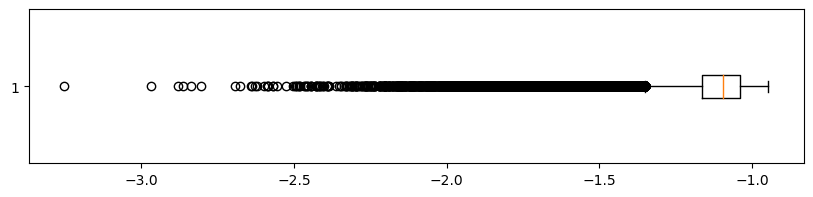

In [67]:
plt.figure(figsize=(10,2))
plt.boxplot(lof.negative_outlier_factor_,vert=False)
plt.show()

In [107]:
fpr,tpr,thresholds = roc_curve(isfraud_,scores,pos_label=1)
auc = roc_auc_score(isfraud_,scores)

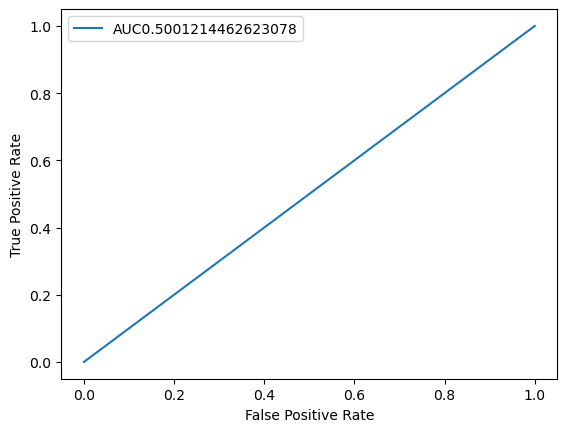

In [108]:
plt.plot(fpr,tpr,label='AUC'+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [109]:
print(classification_report(isfraud_,scores))

              precision    recall  f1-score   support

          -1       0.08      0.01      0.02     24825
           1       0.92      0.99      0.95    282686

    accuracy                           0.91    307511
   macro avg       0.50      0.50      0.49    307511
weighted avg       0.85      0.91      0.88    307511



# Conclusion

The model could definitely be tuned to work a lot better, however, it takes time to train. It is by pure luck that at first try, the performance is 92%.